## **Music Clustering Project** 🎶
### **A Machine Learning Prject** 🤖

This project demonstrates how to group music based on its characteristics using K-Means Clustering, an **unsupervised machine learning algorithm**. It helps identify patterns within the data and can be useful for organizing playlists, making music recommendations, and analyzing trends.

## 1 Data Collection and Wraling 📥🛠️

> The data can be found in: https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset

> Check the link to data columns documnentation

1.1 Libs and Reads CSV

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans


# Carregar dados
df = pd.read_csv("high_popularity_spotify_data.csv")
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


1.2 Numeric data selection

In [314]:
X = df.select_dtypes(include=[np.number])
print(f'numerics columns: {X.columns}')

numerics columns: Index(['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
       'time_signature', 'speechiness', 'track_popularity', 'instrumentalness',
       'mode', 'key', 'duration_ms', 'acousticness'],
      dtype='object')


1.3 Data normalization

In [315]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2 K-Means Clustering Aplication 📊

2.1 Elbow Method to defining clusters number

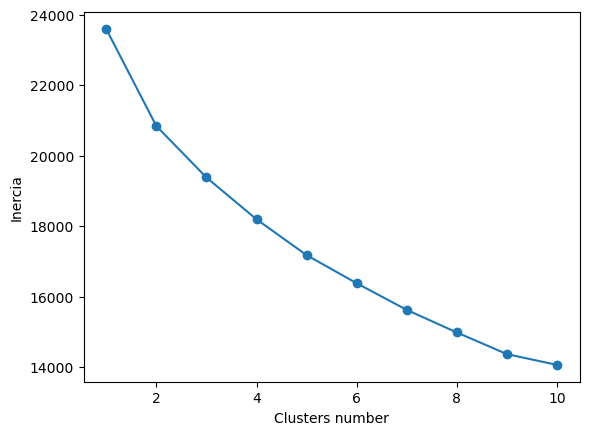

In [323]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Method Plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Clusters number")
plt.ylabel("Inercia")
plt.show()

2.2 Model Training and Cluster Creation

In [317]:
# Apply K-Means and creat Cluster column"
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ajuste o número de clusters conforme necessário
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Group by Cluster
df.groupby('Cluster').mean(numeric_only=True)

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
Cluster,,,,,,,,,,,,,,
0,0.654251,116.340587,0.764043,-6.298132,0.148693,0.604156,4.009138,0.140352,75.291123,0.019213,0.420366,5.823760,197369.436031,0.210581
1,0.406876,117.954099,0.529062,-10.905059,0.142275,0.335568,3.661765,0.054571,77.176471,0.107243,0.709559,5.724265,227668.507353,0.590290
2,0.791821,127.970981,0.566895,-5.420710,0.210931,0.512861,4.001543,0.073779,75.839506,0.040303,0.709877,4.601852,229384.138889,0.078877


## 3 Clusters Analysis 📚

3.1 Clusters stats

In [318]:
df.groupby('Cluster').mean(numeric_only=True)  # Cluster stats resume
df['Cluster'].value_counts()  # Elements quantity in each cluster

Cluster
0    766
2    648
1    272
Name: count, dtype: int64

3.2 Clusters visualization

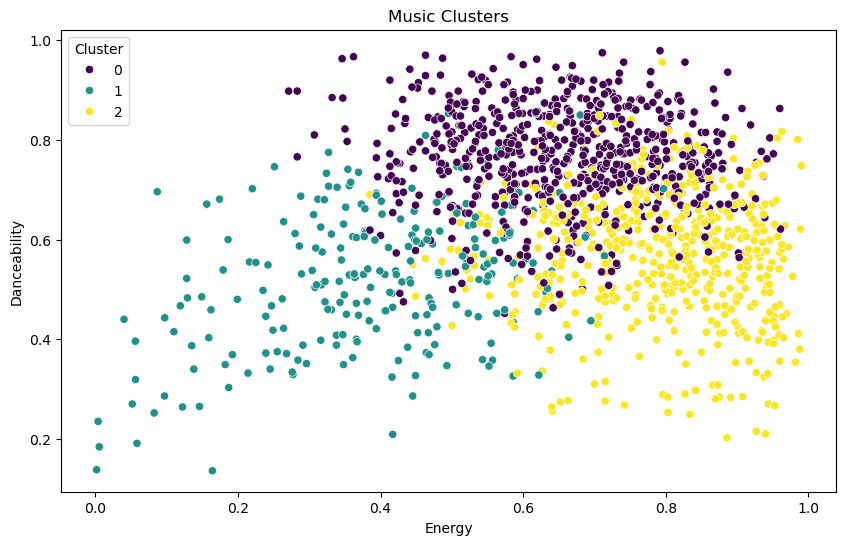

In [324]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['energy'], y=df['danceability'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Music Clusters")
plt.show()


3.3 Principal Component Analysis (PCA)

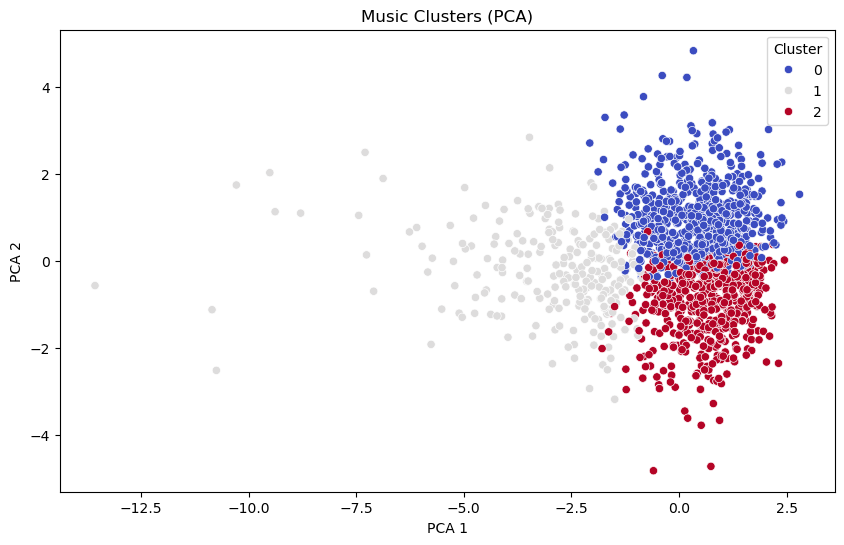

In [325]:
pca = PCA(n_components=2)  # 2 dimensions
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='coolwarm')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Music Clusters (PCA)")
plt.show()


3.4 Clusters caracterization

/tmp/ipykernel_18670/3011819573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], palette="Set2")


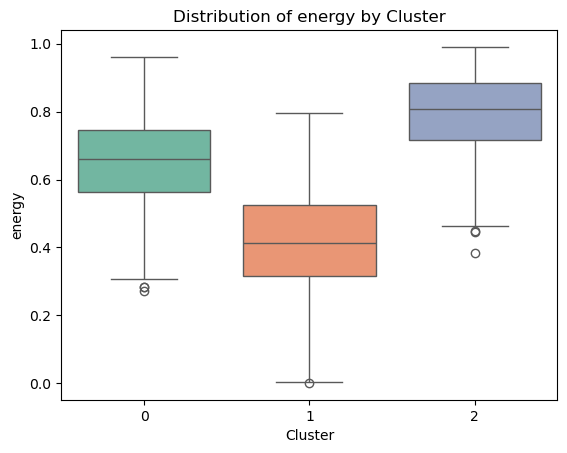

/tmp/ipykernel_18670/3011819573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], palette="Set2")


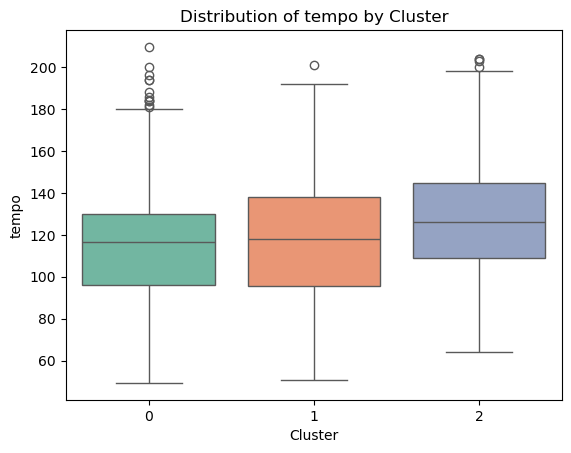

/tmp/ipykernel_18670/3011819573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], palette="Set2")


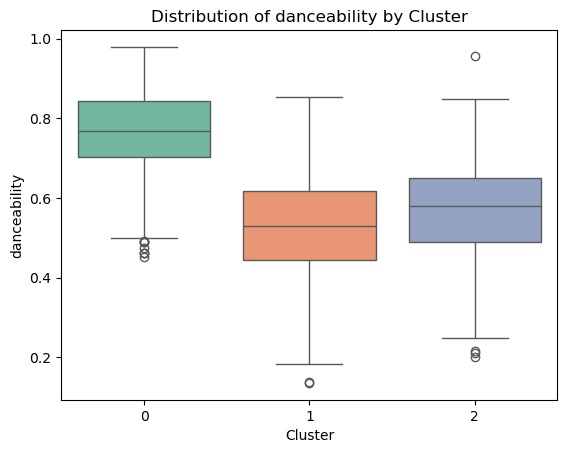

/tmp/ipykernel_18670/3011819573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], palette="Set2")


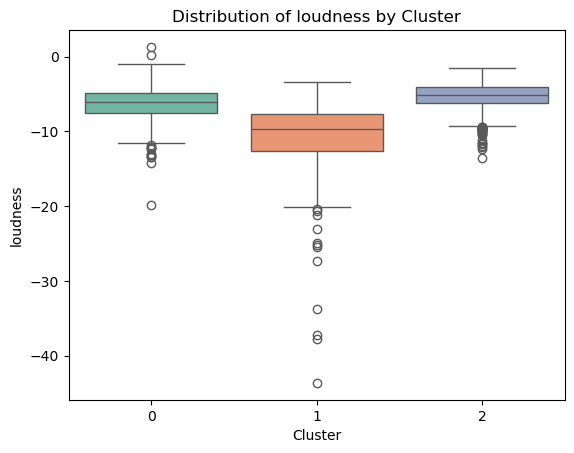

In [327]:
for col in ['energy', 'tempo', 'danceability', 'loudness']:
    sns.boxplot(x=df['Cluster'], y=df[col], palette="Set2")
    plt.title(f"Distribution of {col} by Cluster")
    plt.show()

3.5 Genre Distribution by Cluster

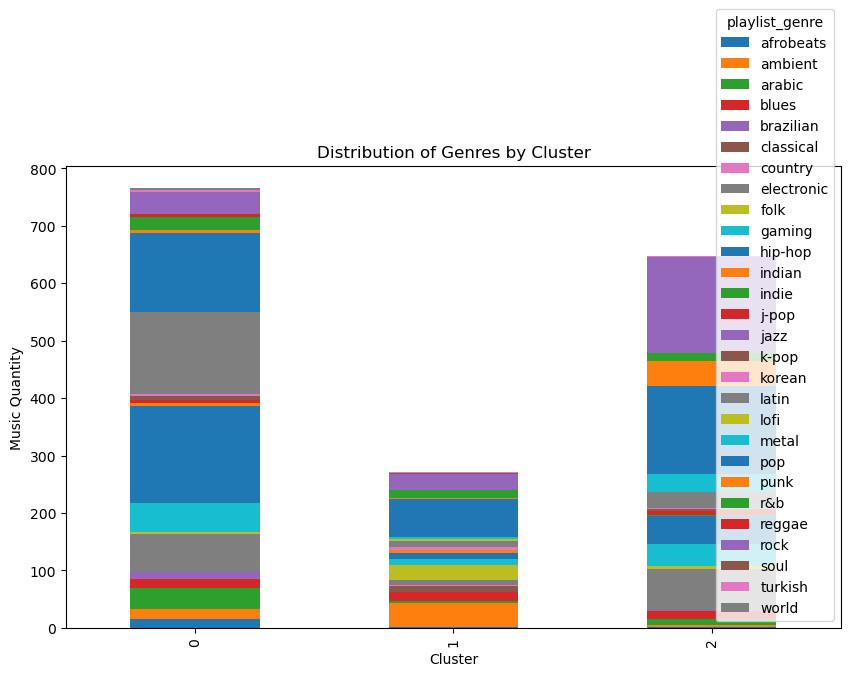

In [328]:
df.groupby(['Cluster', 'playlist_genre']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel("Music Quantity")
plt.title("Distribution of Genres by Cluster")
plt.show()

3.6 Genre Rank

In [329]:
# Contar a frequência de cada gênero por cluster
genre_counts = df.groupby(['Cluster', 'playlist_genre']).size().reset_index(name='count')

# Ordenar por cluster e contagem do gênero (do mais comum para o menos comum)
genre_counts = genre_counts.sort_values(by=['Cluster', 'count'], ascending=[True, False])

# Adicionar um ranking dentro de cada cluster
genre_counts['rank'] = genre_counts.groupby('Cluster')['count'].rank(method='first', ascending=False)

# Exibir o ranking de gêneros por cluster
print(genre_counts[['Cluster', 'playlist_genre', 'count', 'rank']])


    Cluster playlist_genre  count  rank
9         0        hip-hop    168   1.0
15        0          latin    143   2.0
16        0            pop    138   3.0
6         0     electronic     66   4.0
8         0         gaming     51   5.0
..      ...            ...    ...   ...
57        2          k-pop      3  16.0
46        2      afrobeats      2  17.0
50        2      brazilian      2  18.0
65        2        turkish      2  19.0
58        2         korean      1  20.0

[66 rows x 4 columns]


3.7 Top 5 Genre

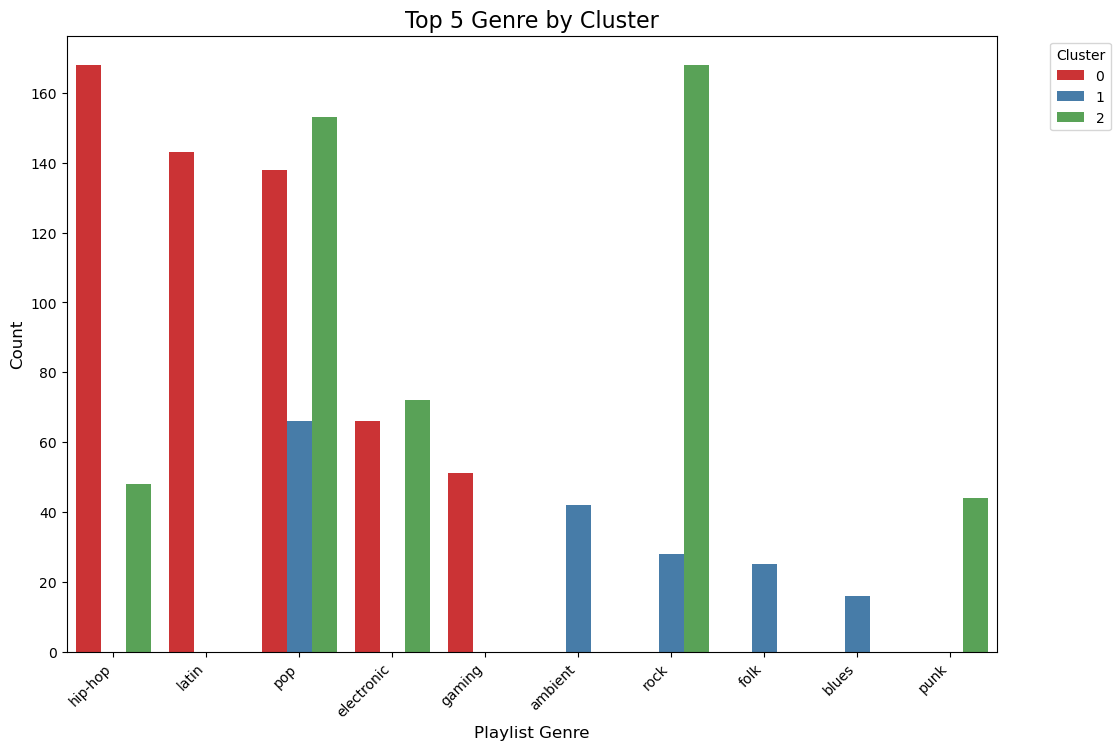

In [345]:
# Filter top 5 genre by cluster
top_genres = genre_counts.groupby('Cluster').head(5)

# Bar graph
plt.figure(figsize=(12, 8))
sns.barplot(data=top_genres, x='playlist_genre', y='count', hue='Cluster', dodge=True, palette='Set1')

plt.title('Top 5 Genre by Cluster', fontsize=16)
plt.xlabel('Playlist Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


3.8 Top 5 Genre Heatmap

Text(95.72222222222221, 0.5, 'Playlist Genre')

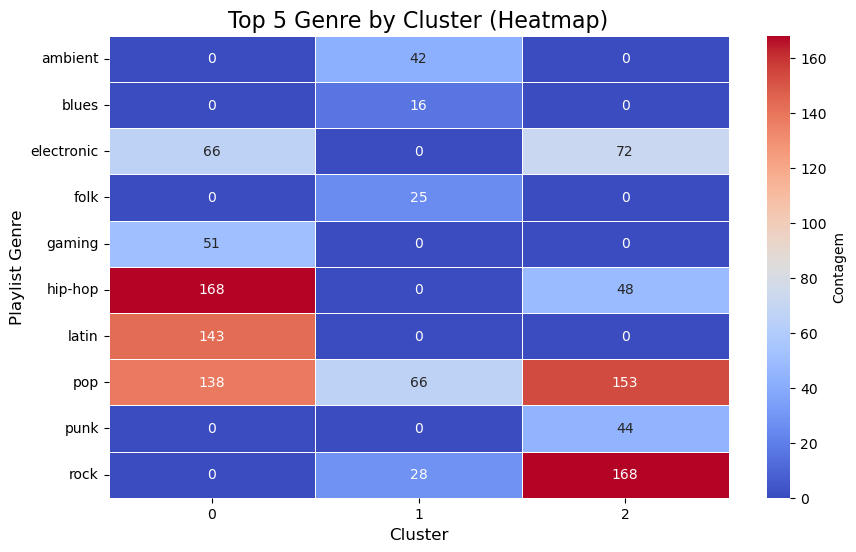

In [348]:
# Pivot
heatmap_data = top_genres.pivot_table(index='playlist_genre', columns='Cluster', values='count', aggfunc='sum', fill_value=0)

# Heatmap graph
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d', cbar_kws={'label': 'Contagem'}, linewidths=0.5)

plt.title('Top 5 Genre by Cluster (Heatmap)', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Playlist Genre', fontsize=12)

## **Conclusion** 🔥

- We used the K-Means Clustering algorithm, an unsupervised machine learning model, to identify patterns and group information within the dataset.
- We defined 3 clusters using the Elbow Method.
- We applied Principal Component Analysis (PCA) for dimensionality reduction.
- We identified the top 5 genres by cluster and visualized them using bar and heatmap graphs.